In [3]:
!pip install pandas numpy matplotlib seaborn ipywidgets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, HTML

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 12

from IPython.display import clear_output

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.6 MB/s eta 0:00:00


In [5]:
from google.colab import files
uploaded = files.upload()

Saving student_exam_scores.csv to student_exam_scores.csv


In [6]:
df = pd.read_csv('student_exam_scores.csv')

In [7]:
np.random.seed(42)
n = 200
data = {
    'student_id': [f'S{str(i).zfill(3)}' for i in range(1, n+1)],
    'hours_studied': np.random.uniform(0, 15, n),
    'sleep_hours': np.random.uniform(4, 10, n),
    'attendance_percent': np.random.uniform(50, 100, n),
    'previous_scores': np.random.uniform(30, 90, n),
    'exam_score': np.random.uniform(20, 100, n)
}
df = pd.DataFrame(data)
df['exam_score'] = df['hours_studied'] * 5 + df['previous_scores'] * 0.3 + np.random.normal(0, 10, n)
df['exam_score'] = df['exam_score'].clip(20, 100)

In [8]:
print("5 data teratas:")
display(df.head())
print("\nInfo dataset:")
df.info()
print("\nStatistik deskriptif:")
df.describe()

5 data teratas:


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,5.618102,7.852190,55.156193,40.136104,41.908350
1,S002,14.260715,4.504840,95.127645,46.715420,71.964755
2,S003,10.979909,4.969772,75.262619,40.620629,70.887713
3,S004,8.979877,9.391325,91.322873,35.322152,61.601889
4,S005,2.340280,7.638574,66.002480,37.238152,28.470748



Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    float64
 5   exam_score          200 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.5+ KB

Statistik deskriptif:


,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,7.260093,7.026251,76.033639,58.726269,55.660693
std,4.423371,1.758007,15.365440,16.730075,22.171004
min,0.082832,4.030370,50.541883,31.086611,20.000000
25%,3.428736,5.568775,62.776016,44.158396,37.111244
50%,7.417294,7.249839,76.269974,58.027679,56.212628
75%,11.352894,8.453196,90.555744,73.464378,71.904490
max,14.803304,9.943031,99.985884,89.397614,100.000000


In [9]:
# Cek missing values
print(df.isnull().sum())

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64


In [21]:
bins = [0, 5, 10, 15]
labels = ['Rendah (<5 jam)', 'Sedang (5-10 jam)', 'Tinggi (>10 jam)']
df['study_category'] = pd.cut(df['hours_studied'], bins=bins, labels=labels, right=False)
bins_attend = [50, 70, 85, 100]
labels_attend = ['Rendah', 'Sedang', 'Tinggi']
df['attendance_category'] = pd.cut(df['attendance_percent'], bins=bins_attend, labels=labels_attend, right=False)
df['passed'] = df['exam_score'].apply(lambda x: 'Lulus' if x >= 50 else 'Tidak Lulus')

In [22]:
total_siswa = len(df)
rata_hours = df['hours_studied'].mean()
rata_exam = df['exam_score'].mean()
rata_attendance = df['attendance_percent'].mean()

print(f"Total Siswa: {total_siswa}")
print(f"Rata-rata Jam Belajar: {rata_hours:.2f}")
print(f"Rata-rata Nilai Ujian: {rata_exam:.2f}")
print(f"Rata-rata Kehadiran: {rata_attendance:.2f}%")

Total Siswa: 200
Rata-rata Jam Belajar: 7.26
Rata-rata Nilai Ujian: 55.66
Rata-rata Kehadiran: 76.03%


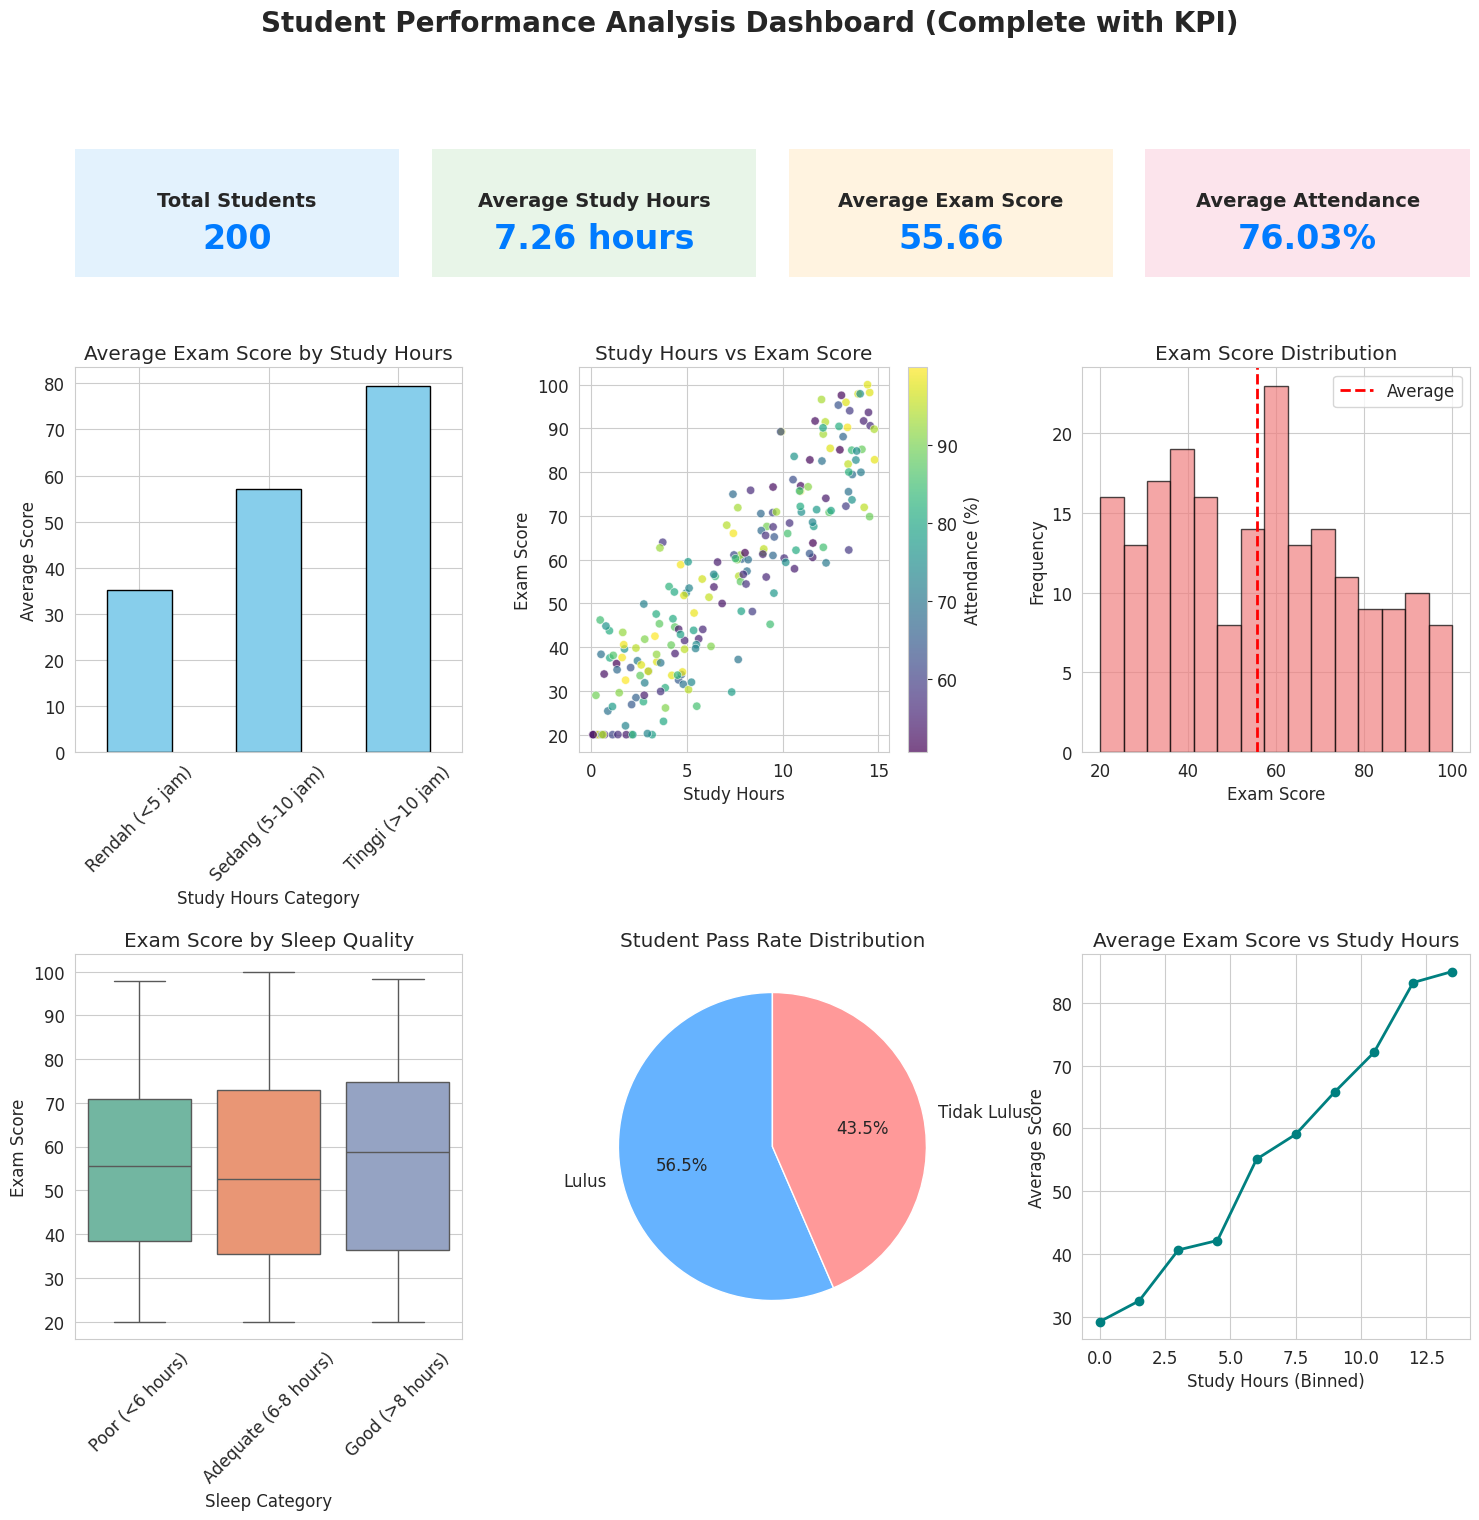

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(18, 14))

gs_main = gridspec.GridSpec(3, 1, height_ratios=[1, 3, 3], hspace=0.3)

gs_kpi = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs_main[0], wspace=0.1)

gs_plot1 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs_main[1], wspace=0.3)

gs_plot2 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs_main[2], wspace=0.3)

total_students = len(df)
avg_hours = df['hours_studied'].mean()
avg_exam = df['exam_score'].mean()
avg_attendance = df['attendance_percent'].mean()

kpi_data = [
    ('Total Students', f'{total_students}', '#e3f2fd'),
    ('Average Study Hours', f'{avg_hours:.2f} hours', '#e8f5e8'),
    ('Average Exam Score', f'{avg_exam:.2f}', '#fff3e0'),
    ('Average Attendance', f'{avg_attendance:.2f}%', '#fce4ec')
]

for i, (title, value, color) in enumerate(kpi_data):
    ax = plt.subplot(gs_kpi[0, i])
    ax.set_facecolor(color)

    ax.text(0.5, 0.6, title,
            ha='center', va='center',
            fontsize=14, weight='bold',
            transform=ax.transAxes)

    ax.text(0.5, 0.3, value,
            ha='center', va='center',
            fontsize=24, color='#007bff',
            weight='bold',
            transform=ax.transAxes)

    ax.set_xticks([])
    ax.set_yticks([])

    for spine in ax.spines.values():
        spine.set_visible(False)

# 1. Bar Chart
ax1 = plt.subplot(gs_plot1[0, 0])
df.groupby('study_category', observed=False)['exam_score'].mean().plot(
    kind='bar', ax=ax1, color='skyblue', edgecolor='black'
)
ax1.set_title('Average Exam Score by Study Hours')
ax1.set_xlabel('Study Hours Category')
ax1.set_ylabel('Average Score')
ax1.tick_params(axis='x', rotation=45)

# 2. Scatter Plot
ax2 = plt.subplot(gs_plot1[0, 1])
sc = ax2.scatter(
    df['hours_studied'], df['exam_score'],
    c=df['attendance_percent'], cmap='viridis', alpha=0.7,
    edgecolors='w', linewidth=0.5
)
ax2.set_title('Study Hours vs Exam Score')
ax2.set_xlabel('Study Hours')
ax2.set_ylabel('Exam Score')
cbar = plt.colorbar(sc, ax=ax2)
cbar.set_label('Attendance (%)')

# 3. Histogram
ax3 = plt.subplot(gs_plot1[0, 2])
ax3.hist(df['exam_score'], bins=15, color='lightcoral', edgecolor='black', alpha=0.7)
ax3.axvline(df['exam_score'].mean(), color='red', linestyle='dashed', linewidth=2, label='Average')
ax3.set_title('Exam Score Distribution')
ax3.set_xlabel('Exam Score')
ax3.set_ylabel('Frequency')
ax3.legend()

# 4. Box Plot
ax4 = plt.subplot(gs_plot2[0, 0])
bins_sleep = [4, 6, 8, 10]
labels_sleep = ['Poor (<6 hours)', 'Adequate (6-8 hours)', 'Good (>8 hours)']
df['sleep_category'] = pd.cut(df['sleep_hours'], bins=bins_sleep, labels=labels_sleep, right=False)

sns.boxplot(
    x='sleep_category', y='exam_score', data=df,
    palette='Set2', ax=ax4, hue='sleep_category', legend=False
)

ax4.set_title('Exam Score by Sleep Quality')
ax4.set_xlabel('Sleep Category')
ax4.set_ylabel('Exam Score')
ax4.tick_params(axis='x', rotation=45)

# 5. Pie Chart
ax5 = plt.subplot(gs_plot2[0, 1])
passed_counts = df['passed'].value_counts()
colors_pie = ['#66b3ff', '#ff9999']

ax5.pie(
    passed_counts, labels=passed_counts.index,
    autopct='%1.1f%%', startangle=90, colors=colors_pie,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

ax5.set_title('Student Pass Rate Distribution')

# 6. Line Chart
ax6 = plt.subplot(gs_plot2[0, 2])
df['hours_bin'] = pd.cut(df['hours_studied'], bins=10, labels=False)
line_data = df.groupby('hours_bin')['exam_score'].mean().reset_index()
line_data['hours_mid'] = line_data['hours_bin'] * 1.5

ax6.plot(line_data['hours_mid'], line_data['exam_score'],
         marker='o', linestyle='-', color='teal', linewidth=2)

ax6.set_title('Average Exam Score vs Study Hours')
ax6.set_xlabel('Study Hours (Binned)')
ax6.set_ylabel('Average Score')

fig.suptitle('Student Performance Analysis Dashboard (Complete with KPI)',
             fontsize=20, fontweight='bold', y=0.98)

for ax in [ax4, ax5, ax6]:
    pos = ax.get_position()
    ax.set_position([
        pos.x0,
        pos.y0 - 0.08,
        pos.width,
        pos.height
    ])

plt.savefig('student_performance_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()
files.download('student_performance_dashboard.png')
